Name: Sven Eppler
Email: sven.eppler@yale.edu
Homework #1

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import requests

key = 'GLzMQYfk8qeRxXLav9zIdl9m9cAUA5pnwto8pN1gp4zz1N9mWosg7M4V'

def search_images_pexels(key, term, min_sz=128, max_images=150):
    headers = {"Authorization": key}
    per_page = 80
    num_pages = (max_images + per_page - 1) // per_page
    images = []

    for page in range(1, num_pages + 1):
        params = {
            "query": term,
            "per_page": per_page,
            "page": page,
            "min_width": min_sz,
            "min_height": min_sz
        }
        response = requests.get("https://api.pexels.com/v1/search", headers=headers, params=params)
        response.raise_for_status()
        images.extend(response.json()['photos'])
        if len(images) >= max_images:
            break

    return images[:max_images]


food_terms = ['pasta', 'rice', 'potatoes']
all_image_urls = {}

for term in food_terms:
    results = search_images_pexels(key, term, max_images=500)
    urls = [photo['src']['original'] for photo in results]
    all_image_urls[term] = urls


for food, urls in all_image_urls.items():
    print(f"Images for {food}:")
    for url in urls:
        print(url)

Images for pasta:
https://images.pexels.com/photos/5907896/pexels-photo-5907896.jpeg
https://images.pexels.com/photos/6103027/pexels-photo-6103027.jpeg
https://images.pexels.com/photos/5907592/pexels-photo-5907592.jpeg
https://images.pexels.com/photos/4748543/pexels-photo-4748543.jpeg
https://images.pexels.com/photos/1437267/pexels-photo-1437267.jpeg
https://images.pexels.com/photos/1279330/pexels-photo-1279330.jpeg
https://images.pexels.com/photos/1487511/pexels-photo-1487511.jpeg
https://images.pexels.com/photos/1438672/pexels-photo-1438672.jpeg
https://images.pexels.com/photos/803963/pexels-photo-803963.jpeg
https://images.pexels.com/photos/1398688/pexels-photo-1398688.jpeg
https://images.pexels.com/photos/1256875/pexels-photo-1256875.jpeg
https://images.pexels.com/photos/1460872/pexels-photo-1460872.jpeg
https://images.pexels.com/photos/1373915/pexels-photo-1373915.jpeg
https://images.pexels.com/photos/42326/noodles-pasta-spaghetti-farfalle-42326.jpeg
https://images.pexels.com/phot

In [ ]:
results = search_images_pexels(key, 'pasta')
ims = [photo['src']['original'] for photo in results]
len(ims)

150

In [ ]:
from fastai.vision.utils import download_images
from fastai.vision.all import Path

food_types = ['pasta', 'rice', 'potatoes']
path = Path('foods')

if not path.exists():
    path.mkdir()
    for food in food_types:
        dest = (path/food)
        dest.mkdir(exist_ok=True)

        results = search_images_pexels(key, food, max_images=500)

        urls = [photo['src']['original'] for photo in results]

        download_images(dest, urls=urls)

In [ ]:
fns = get_image_files(path)
fns

(#300) [Path('foods/potatoes/dd45fb2a-0c6b-4599-8619-287a68621732.jpeg'),Path('foods/potatoes/0b8dc0ef-acfb-4827-abe7-cb80376ac9cb.jpeg'),Path('foods/potatoes/2182041b-4eb7-42bf-90fd-ecdc95ec07c6.jpeg'),Path('foods/potatoes/d4d32693-fce2-4fb0-968f-4c74072c07c9.jpeg'),Path('foods/potatoes/321140af-7b45-4936-a472-42bf34f51420.jpeg'),Path('foods/potatoes/fa5e6be8-c629-42ce-83dd-a642cf6fe50a.jpeg'),Path('foods/potatoes/8ccc06e4-339b-45fa-9c42-d95c0f6c5167.jpeg'),Path('foods/potatoes/517accef-8f61-4732-a20d-eab135056af4.jpeg'),Path('foods/potatoes/b2a8769b-2807-4ac8-9087-80b6f5b24325.jpeg'),Path('foods/potatoes/8c8731fe-040d-4648-98ac-43e5f622e604.jpeg')...]

In [ ]:
food_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = food_data.dataloaders(path, bs=32)

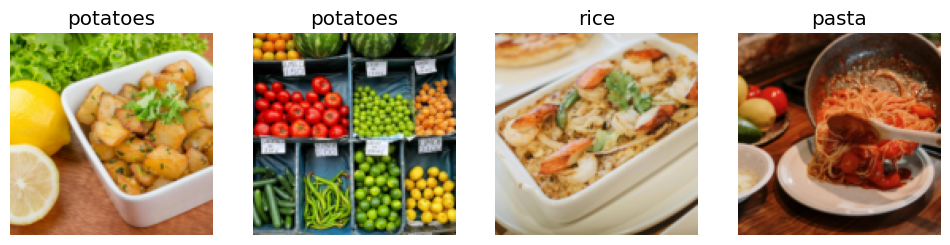

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

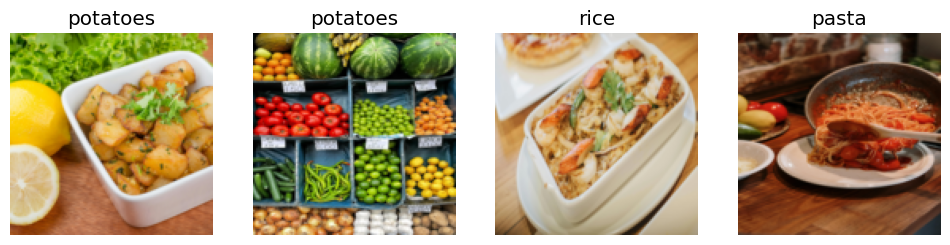

In [ ]:
food_data = food_data.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = food_data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

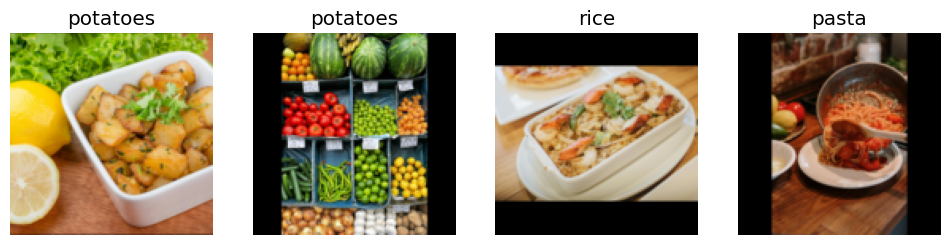

In [ ]:
food_data = food_data.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = food_data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
#error
food_data = food_data.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = food_data.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
#error
food_data = food_data.new(
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(mult=2)
)

dls = food_data.dataloaders(path)

dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
food_data = food_data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

dls = food_data.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s]


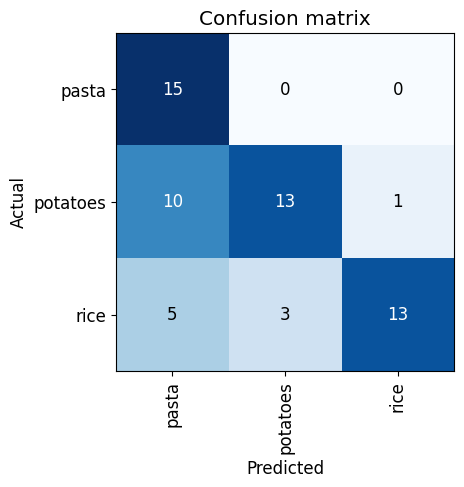

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

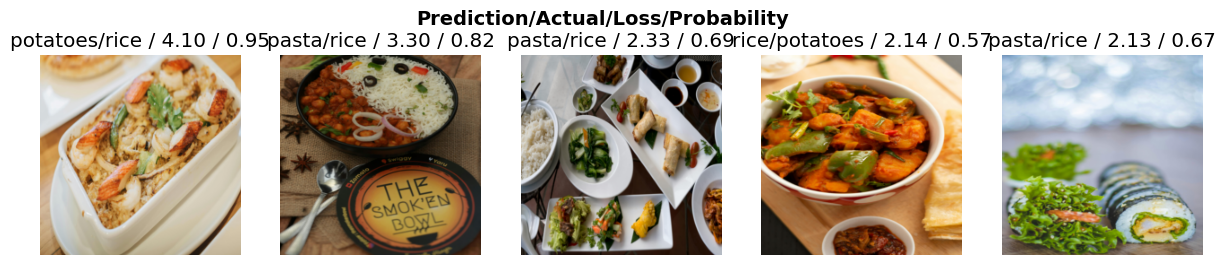

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Online Application

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
from pathlib import Path

# Path to pasta images
pasta_path = Path('foods/pasta')
print(list(pasta_path.ls()))


[Path('foods/pasta/1355b6c4-fa16-4ccf-a4ad-d6283e35a15d.jpeg'), Path('foods/pasta/90965552-2ad1-449f-8ac4-ba285029e8b2.jpeg'), Path('foods/pasta/1e54368f-1f60-428c-913c-b68169021702.jpeg'), Path('foods/pasta/51e2b890-0753-4968-a97d-d7dcdb1342d6.jpeg'), Path('foods/pasta/f3722e25-9383-409b-9df6-d7ddb2be5de9.jpeg'), Path('foods/pasta/03904c3c-7230-4468-b1e9-34227490b99a.jpeg'), Path('foods/pasta/d8f6e5c9-0f2e-4ed6-8746-63700f5a9cb5.jpeg'), Path('foods/pasta/b9d813a5-c37a-4fa3-9de8-88aaaed60ee4.jpeg'), Path('foods/pasta/2f134859-ecd7-4bc9-81e4-8bed847d0ad8.jpeg'), Path('foods/pasta/0dd1f838-159e-4eb6-9577-23e041ec59c0.jpg'), Path('foods/pasta/8e62f03a-43e6-4b03-acf4-108a3c7b864f.jpeg'), Path('foods/pasta/c8fd24ee-fba9-447b-8614-5bc118cfb030.jpeg'), Path('foods/pasta/474aec01-0033-4fa9-9d3e-7d663925d68b.jpeg'), Path('foods/pasta/8814b25b-2775-4c83-9666-48d214745fcd.jpeg'), Path('foods/pasta/c2aace30-1a1e-44f7-9e49-73453ad856ca.jpeg'), Path('foods/pasta/8b3df001-8e8c-470d-a8c6-c3c7e5e022f4.

In [ ]:
learn_inf.predict('foods/pasta/1355b6c4-fa16-4ccf-a4ad-d6283e35a15d.jpeg')

('pasta', tensor(0), tensor([0.6752, 0.1762, 0.1486]))

In [ ]:
learn_inf.dls.vocab

['pasta', 'potatoes', 'rice']

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['foods/pasta/1355b6c4-fa16-4ccf-a4ad-d6283e35a15d.jpeg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: pasta; Probability: 0.6752')

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your carbohydrate!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [49]:
!pip install jupyter-client==7.4.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter_client 8.6.2
    Uninstalling jupyter_client-8.6.2:
      Successfully uninstalled jupyter_client-8.6.2


In [50]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila

#To view your notebook as a Voilà web application, replace the word "notebooks" in your browser's URL with: "voila/render". You will see the same content as your notebook, but without any of the code cells.

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.7 OK
